In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [58]:
from util import filter_data, add_significance, compute_median, extract_population_stats

In [62]:
CL = dict(gray=[199/255, 199/255, 199/255], orange=[255/255, 187/255, 120/255], \
         cyan=[158/255, 218/255, 229/255], white=[1, 1, 1])
C = dict(gray=[127/255, 127/255, 127/255], orange=[255/255, 127/255, 14/255], \
         cyan=[23/255, 190/255, 207/255], white=[1, 1, 1])

In [72]:
mata = np.load('data/eTK118individual.npz',allow_pickle = True, encoding='latin1')
minvalue = min([min([min(mata['BODIPY'][()]['{0}2-Site_{1}'.format(j, i)]) for i in range(5)]) for j in ('E', 'F', 'G')])
bodipy = mata['BODIPY'][()]
for key in bodipy.keys():
    bodipy[key] -= minvalue
hifdict = mata['HIF'][()]
for key in hifdict.keys():
    hifdict[key] = filter_data(np.array(hifdict[key]))
minvalue = min([min([min(hifdict['{0}2-Site_{1}'.format(j, i)]) for i in range(5)]) for j in ('E', 'F', 'G')])
for key in hifdict.keys():
    hifdict[key] -= minvalue

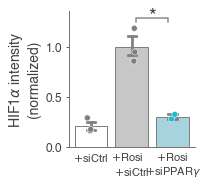

In [73]:
palette=[C['gray'], C['gray'], C['cyan']]
palette1=[CL['white'], CL['gray'],  CL['cyan']]
barprop = dict(ci=68, capsize=0.2, errcolor=C['gray'], edgecolor=C['gray'])

hif = dict()
d = [[np.median(hifdict['{0}2-Site_{1}'.format(j, i)]) for i in range(5)] for j in ['E', 'F', 'G']]
hif['siCtrl_N'] = [i for j in d for i in j]
hif['siCtrl_N'] = [np.median(di) for di in d]
d = [[np.median(hifdict['{0}4-Site_{1}'.format(j, i)]) for i in range(5)] for j in ['E', 'F', 'G']]
hif['siCtrl_R'] = [np.median(di) for di in d]
d = [[np.median(hifdict['{0}7-Site_{1}'.format(j, i)]) for i in range(5)] for j in ['B', 'C', 'D']] 
d = [[np.median(hifdict['{0}4-Site_{1}'.format(j, i)]) for i in range(5)] for j in ['B', 'C', 'D']] 
hif['siPPAR_R'] = [np.median(di) for di in d]
hif['siPPAR_R'][1] = np.nan # C was bad from the image.

ms = np.mean(hif['siCtrl_R'])
for k, v in hif.items():
    hif[k] = v/ms

fig, ax = plt.subplots(1, 1, figsize=(2.25, 2.5))

df = pd.DataFrame.from_dict(hif)
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=pd.DataFrame(hif), ax=ax,  palette=palette1, **barprop)

ax.set_xticklabels(['$+$siCtrl', '$+$Rosi    \n$+$siCtrl',  '$+$Rosi\n'+r'$+$siPPAR$\gamma$'], fontsize=11,horizontalalignment='center')

ax.set_ylabel('HIF1$\\alpha$ intensity\n(normalized)', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)

if ttest_ind(df.iloc[:, 1], df.iloc[:, 2].dropna()).pvalue < 0.05:
    add_significance(ax, bar, q0=1, q1=2, yoff=0.1)

In [74]:
alldata = [np.load('data/etk340B_{0}.npz'.format(i)) for i in (1, 2, 3)]

In [81]:

reference_wells = ['B4', 'C4', 'D4']
data_reference = extract_population_stats(reference_wells, alldata, ch=1)
min_val = np.min(data_reference)

si = {}
si['nostim'] = compute_median(data_reference, min_val)
si['ctrl'] = compute_median(extract_population_stats(['B3', 'C3', 'D3'], alldata, ch=1), min_val)
si['abcd'] = compute_median(extract_population_stats(['E3', 'F3', 'G3'], alldata, ch=1), min_val)

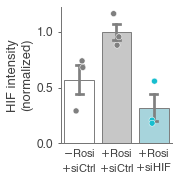

In [84]:
palette=[C['gray'], C['gray'], C['cyan'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['cyan'], CL['cyan']]

barprop = dict(ci=68, capsize=0.2, errcolor=C['gray'], edgecolor=C['gray'])

df = pd.DataFrame(si)/np.mean(si['ctrl'])
fig, ax = plt.subplots(1, 1, figsize=(2., 2.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=df, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['$-$Rosi\n$+$siCtrl', '$+$Rosi\n$+$siCtrl', '$+$Rosi\n'+r'$+$siHIF'], fontsize=11, ha='center')

ax.set_ylabel('HIF intensity\n(normalized)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)

ax.set_yticks([0.0, 0.5, 1.0]);

In [89]:
alldata = [np.load('data/etk340B_{0}.npz'.format(i)) for i in (1, 2, 3)]

In [90]:
reference_wells = ['B4', 'C4', 'D4']
data_reference = extract_population_stats(reference_wells, alldata, ch=1)
min_val = np.min(data_reference)

si1 = {}
si1['nostim'] = compute_median(data_reference, min_val)
si1['ctrl'] = compute_median(extract_population_stats(['B8', 'C8', 'D8'], alldata, ch=1), min_val)
si1['abcd'] = compute_median(extract_population_stats(['E8', 'F8', 'G8'], alldata, ch=1), min_val)

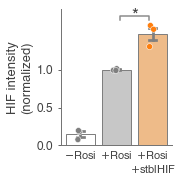

In [91]:
palette=[C['gray'], C['gray'], C['orange'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['orange'], CL['cyan']]

df = pd.DataFrame(si1)/np.mean(si1['ctrl'])
fig, ax = plt.subplots(1, 1, figsize=(2., 2.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=df, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['$-$Rosi', '$+$Rosi', '$+$Rosi\n'+r'$+$stblHIF'], fontsize=11, ha='center')

ax.set_ylabel('HIF intensity\n(normalized)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)
ax.set_yticks([0.0, 0.5, 1.0])

add_significance(ax, bar, q0=1, q1=2, fontsize=18, yoff=0.05)

In [25]:
data = np.load('data/op9r.npz', allow_pickle=True, encoding='latin1')
alldata = [data['plate1'].item(), data['plate2'].item(), data['plate3'].item()]

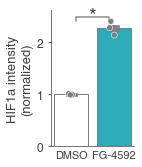

In [26]:
ch = {}
ch['dmso'] = compute_median(extract_population_stats(['E2', 'F2', 'G2'], alldata, ch=1))
ch['highFG'] = compute_median(extract_population_stats(['E4', 'F4', 'G4'], alldata, ch=1))

df = pd.DataFrame(ch)/np.mean(ch['dmso'])
fig, ax = plt.subplots(1, 1, figsize=(1.5, 2.5))
sns.stripplot(data=df, palette=palette, edgecolor='w', linewidth=0.5, size=6)

bar = sns.barplot(data=df, ax=ax, palette=[palette1[0], palette1[4]], **barprop)
ax.set_xticklabels(['DMSO', 'FG-4592'], fontsize=11)
# ax.set_xticks(np.array([-0.6, 0.4, 1.4, 2.5])+0.15)

ax.set_ylabel('HIF1a intensity\n(normalized)', fontsize=13)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='x', length=0)

if ttest_ind(df.iloc[:, 0], df.iloc[:, 1]).pvalue < 0.05:
    add_significance(ax, bar, 0, 1,)

In [41]:
data = loadmat('data/meanlevel_compiled.mat')
for i in ('meanbodipy', 'meanhif1a', 'meanpparg', 'percdiffplate'):
    data[i] = data[i].T.flatten()

In [42]:
labelorder = ['noSI_D','noSI_D','noSI_R','noSI_R','noSI_C','noSI_C','AS_C','AS_C','AS_C','Dm_C','Dm_C','Dm_C','AS_D','AS_D','AS_D','AS_R','AS_R','AS_R','Dm_D','Dm_D','Dm_D','Dm_R','Dm_R','Dm_R','hf1_D','hf1_D','hf1_D','hf1_R','hf1_R','hf1_R','hf2_D','hf2_D','hf2_D','hf2_R','hf2_R','hf2_R','Ppg_D','Ppg_D','Ppg_D','Ppg_R','Ppg_R','Ppg_R','Cpb_D','Cpb_D','Cpb_D','Cpb_R','Cpb_R','Cpb_R','Cpa_D','Cpa_D','Cpa_D','Cpa_R','Cpa_R','Cpa_R','F4_D','F4_D','F4_D','F4_R','F4_R','F4_R']

In [43]:
hifind = [i for i, _ in enumerate(labelorder) if _.startswith('hf')]
nothifind = [i for i, _ in enumerate(labelorder) if not _.startswith('hf')]
pparind = [i for i, _ in enumerate(labelorder) if _.startswith('Ppg')]
cpbind = [i for i, _ in enumerate(labelorder) if _.startswith('Cpb')]

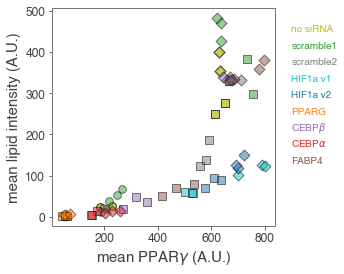

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

coldict = dict(Cpb='tab:purple', Cpa='tab:red', F4='tab:brown', Ppg='tab:orange', noSI='tab:olive', AS='tab:green', Dm='tab:gray', hf1='tab:cyan', hf2='tab:blue')
shapedict = dict(C='o', D='s', R='D')
lbdict = dict(Cpb=r'CEBP$\beta$', Cpa=r'CEBP$\alpha$', F4='FABP4', Ppg='PPARG', noSI='no siRNA', AS='scramble1', Dm='scramble2', hf1='HIF1a v1', hf2='HIF1a v2')

st = []
count = 0

for n, i in enumerate(labelorder):
    kwards = dict(c=coldict[i.split('_')[0]], marker=shapedict[i.split('_')[1]])
    ax.scatter(data['meanpparg'][n], data['meanbodipy'][n]/1000, s=60, edgecolors='k', alpha=0.5, **kwards)
    if not i.split('_')[0] in st:
        ax.text(900, 450-40*count, lbdict[i.split('_')[0]], color=coldict[i.split('_')[0]])
        st.append(i.split('_')[0])
        count += 1
    if i.split('_')[0]=='noSI':
        ax.scatter(data['meanpparg'][n], data['meanbodipy'][n]/1000, s=60, edgecolors='k', label=r'siHIF1$\alpha$', alpha=0.5, **kwards)
    
ax.set_xlabel(r'mean PPAR$\gamma$ (A.U.)', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
xlim = ax.get_xlim()

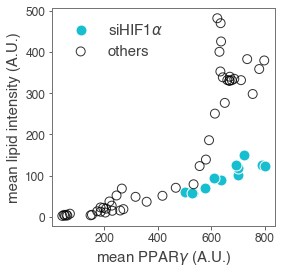

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(data['meanpparg'][hifind], data['meanbodipy'][hifind]/1000, s=120, edgecolors='w', c='tab:cyan', label=r'siHIF1$\alpha$')
ax.scatter(data['meanpparg'][nothifind], data['meanbodipy'][nothifind]/1000, alpha=0.8, c='none', s=80, edgecolors='k', label='others')
ax.set_xlabel(r'mean PPAR$\gamma$ (A.U.)', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
ax.legend(frameon=False, fontsize=15)
xlim = ax.get_xlim()

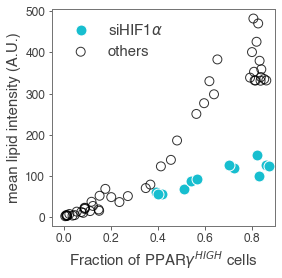

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

ax.scatter(data['percdiffplate'][hifind]/100, data['meanbodipy'][hifind]/1000, s=120, edgecolors='w', c='tab:cyan', label=r'siHIF1$\alpha$')
ax.scatter(data['percdiffplate'][nothifind]/100, data['meanbodipy'][nothifind]/1000, alpha=0.8, c='none', s=80, edgecolors='k', label='others')
ax.set_xlabel(r'Fraction of PPAR$\gamma^{HIGH}$ cells', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
ax.set_xlim(-0.05, 0.9)
ax.legend(frameon=False, fontsize=15)

In [50]:
import statsmodels.formula.api as smf

In [51]:
b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)
for n, i in enumerate(labelorder):
    if i.split('_')[1] == 'C':
        b0[n] = True
    if i.split('_')[0] == 'hf1' or i.split('_')[0] == 'hf2':
        b1[n] = True
# plt.scatter(data['percdiffplate'][b0 | b1]/100, data['meanbodipy'][b0 | b1]/1000)
# plt.scatter(data['percdiffplate'][b0 | ~b1]/100, data['meanbodipy'][b0 | ~b1]/1000)

X = data['percdiffplate'][~b0]/100
Y = data['meanbodipy'][~b0]/1000

# df = pd.DataFrame([data['percdiffplate'], data['meanbodipy'], (~b0 & ~b1).astype(np.uint8)]).T
df = pd.DataFrame([X, Y, (b1[~b0]).astype(np.uint8)]).T

df.columns = ['diff', 'bodipy', 'hif']
mod = smf.ols(formula='bodipy ~ diff + diff:hif', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bodipy   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     323.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           6.06e-29
Time:                        19:17:40   Log-Likelihood:                -266.02
No. Observations:                  52   AIC:                             538.0
Df Residuals:                      49   BIC:                             543.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4837     10.819     -2.633      0.0

/var/folders/73/gtczzr294y3b_b50h3tj324m0000gp/T/ipykernel_33697/3145207852.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)


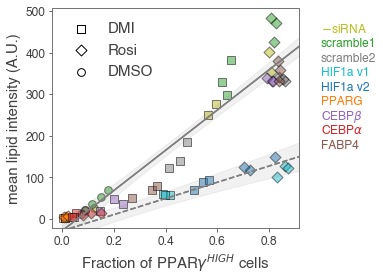

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(5.5, 4))

coldict = dict(Cpb='tab:purple', Cpa='tab:red', F4='tab:brown', Ppg='tab:orange', noSI='tab:olive', AS='tab:green', Dm='tab:gray', hf1='tab:cyan', hf2='tab:blue')
shapedict = dict(C='o', D='s', R='D')
lbdict = dict(Cpb=r'CEBP$\beta$', Cpa=r'CEBP$\alpha$', F4='FABP4', Ppg='PPARG', noSI='$-$siRNA', AS='scramble1', Dm='scramble2', hf1='HIF1a v1', hf2='HIF1a v2')

st = []
count = 0

for n, i in enumerate(labelorder):
    kwards = dict(c=coldict[i.split('_')[0]], marker=shapedict[i.split('_')[1]])
    ax.scatter(data['percdiffplate'][n]/100, data['meanbodipy'][n]/1000, s=60, edgecolors='k', alpha=0.5, **kwards)
    if not i.split('_')[0] in st:
        ax.text(1.0, 450-35*count, lbdict[i.split('_')[0]], color=coldict[i.split('_')[0]], size=12)
        st.append(i.split('_')[0])
        count += 1

ax.set_xlim(ax.get_xlim()) 
ax.set_ylim(ax.get_ylim()) 
        
for n, i in enumerate(labelorder):
    kwards = dict(c=coldict[i.split('_')[0]], marker=shapedict[i.split('_')[1]])
    if n==0:
        kwards['c'] = 'w'
        ax.scatter(1000, 1000, s=60, edgecolors='k', label='DMI', alpha=1, **kwards)
    elif n==2:
        kwards['c'] = 'w'
        ax.scatter(1000, 1000, s=60, edgecolors='k', label='Rosi', alpha=1, **kwards)
    elif n==4:
        kwards['c'] = 'w'
        ax.scatter(1000, 1000, s=60, edgecolors='k', label='DMSO', alpha=1, **kwards)
        
ax.set_xlabel(r'Fraction of PPAR$\gamma^{HIGH}$ cells', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
xlim = ax.get_xlim()

ax.legend(frameon=False, fontsize=15)

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.zeros(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '-', c='tab:gray')
predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '-', c='tab:gray')
ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.ones(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '--', c='tab:gray')

predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '--', c='tab:gray')
plt.tight_layout()

ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')

In [53]:
b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)
for n, i in enumerate(labelorder):
    if i.split('_')[1] == 'C':
        b0[n] = True
    if i.split('_')[0] == 'hf1' or i.split('_')[0] == 'hf2':
        b1[n] = True
# plt.scatter(data['percdiffplate'][b0 | b1]/100, data['meanbodipy'][b0 | b1]/1000)
# plt.scatter(data['percdiffplate'][b0 | ~b1]/100, data['meanbodipy'][b0 | ~b1]/1000)

X = data['meanhif1a'][~b0]
Y = data['meanbodipy'][~b0]/1000

# df = pd.DataFrame([data['percdiffplate'], data['meanbodipy'], (~b0 & ~b1).astype(np.uint8)]).T
df = pd.DataFrame([X, Y, (b1[~b0]).astype(np.uint8)]).T

df.columns = ['diff', 'bodipy', 'hif']
mod = smf.ols(formula='bodipy ~ diff + diff:hif', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bodipy   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     264.0
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           5.79e-27
Time:                        19:18:10   Log-Likelihood:                -270.86
No. Observations:                  52   AIC:                             547.7
Df Residuals:                      49   BIC:                             553.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -103.0697     14.780     -6.973      0.0

/var/folders/73/gtczzr294y3b_b50h3tj324m0000gp/T/ipykernel_33697/3501196811.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)


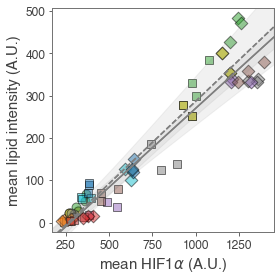

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

coldict = dict(Cpb='tab:purple', Cpa='tab:red', F4='tab:brown', Ppg='tab:orange', noSI='tab:olive', AS='tab:green', Dm='tab:gray', hf1='tab:cyan', hf2='tab:blue')
shapedict = dict(C='o', D='s', R='D')
lbdict = dict(Cpb=r'CEBP$\beta$', Cpa=r'CEBP$\alpha$', F4='FABP4', Ppg='PPARG', noSI='no siRNA', AS='scramble1', Dm='scramble2', hf1='HIF1a v1', hf2='HIF1a v2')

st = []
count = 0

for n, i in enumerate(labelorder):
    kwards = dict(c=coldict[i.split('_')[0]], marker=shapedict[i.split('_')[1]])
    ax.scatter(data['meanhif1a'][n], data['meanbodipy'][n]/1000, s=80, edgecolors='k', alpha=0.5, **kwards)
    if not i.split('_')[0] in st:
#         ax.text(900, 450-40*count, lbdict[i.split('_')[0]], color=coldict[i.split('_')[0]])
        st.append(i.split('_')[0])
        count += 1
    if i.split('_')[0]=='noSI':
        ax.scatter(data['meanhif1a'][n], data['meanbodipy'][n]/1000, s=80, edgecolors='k', label=r'siHIF1$\alpha$', alpha=0.5, **kwards)
    
ax.set_xlabel(r'mean HIF1$\alpha$ (A.U.)', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.set_ylim(ax.get_ylim())

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.zeros(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '-', c='tab:gray')
predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '-', c='tab:gray')
ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.ones(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '--', c='tab:gray')

predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '--', c='tab:gray')

ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')
plt.tight_layout()


In [55]:
b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)
for n, i in enumerate(labelorder):
    if i.split('_')[1] == 'C':
        b0[n] = True
    if i.split('_')[0] == 'hf1' or i.split('_')[0] == 'hf2':
        b1[n] = True
X = data['meanpparg'][~b0]
Y = data['meanbodipy'][~b0]/1000
# df = pd.DataFrame([data['percdiffplate'], data['meanbodipy'], (~b0 & ~b1).astype(np.uint8)]).T
df = pd.DataFrame([X, Y, (b1[~b0]).astype(np.uint8)]).T

df.columns = ['diff', 'bodipy', 'hif']
mod = smf.ols(formula='bodipy ~ diff + diff:hif', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 bodipy   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     96.14
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           1.09e-17
Time:                        19:19:08   Log-Likelihood:                -293.52
No. Observations:                  52   AIC:                             593.0
Df Residuals:                      49   BIC:                             598.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -83.0047     23.124     -3.590      0.0

/var/folders/73/gtczzr294y3b_b50h3tj324m0000gp/T/ipykernel_33697/234062932.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  b0, b1 = np.zeros(len(labelorder), np.bool), np.zeros(len(labelorder), np.bool)


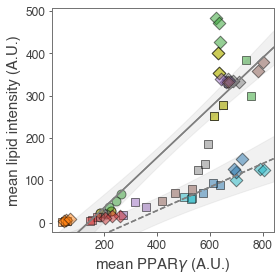

In [56]:
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

coldict = dict(Cpb='tab:purple', Cpa='tab:red', F4='tab:brown', Ppg='tab:orange', noSI='tab:olive', AS='tab:green', Dm='tab:gray', hf1='tab:cyan', hf2='tab:blue')
shapedict = dict(C='o', D='s', R='D')
lbdict = dict(Cpb=r'CEBP$\beta$', Cpa=r'CEBP$\alpha$', F4='FABP4', Ppg='PPARG', noSI='no siRNA', AS='scramble1', Dm='scramble2', hf1='HIF1a v1', hf2='HIF1a v2')

st = []
count = 0

for n, i in enumerate(labelorder):
    kwards = dict(c=coldict[i.split('_')[0]], marker=shapedict[i.split('_')[1]])
    ax.scatter(data['meanpparg'][n], data['meanbodipy'][n]/1000, s=80, edgecolors='k', alpha=0.5, **kwards)
    if not i.split('_')[0] in st:
#         ax.text(900, 450-40*count, lbdict[i.split('_')[0]], color=coldict[i.split('_')[0]])
        st.append(i.split('_')[0])
        count += 1
    if i.split('_')[0]=='noSI':
        ax.scatter(data['meanpparg'][n], data['meanbodipy'][n]/1000, s=80, edgecolors='k', label=r'siHIF1$\alpha$', alpha=0.5, **kwards)
    
ax.set_xlabel(r'mean PPAR$\gamma$ (A.U.)', fontsize=15)
ax.set_ylabel('mean lipid intensity (A.U.)', fontsize=15)
xlim = ax.get_xlim()
ax.set_xlim(xlim)
ax.set_ylim(ax.get_ylim())

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.zeros(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '-', c='tab:gray')
predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '-', c='tab:gray')
ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')

sx = np.linspace(0, xlim[1])
sdf = pd.DataFrame([sx, np.ones(len(sx))], index=['diff', 'hif']).T
sy = res.predict(sdf)
ax.plot(sx, sy, '--', c='tab:gray')

predictions = res.get_prediction(sdf)
sframe = predictions.summary_frame(alpha=0.05)
ax.plot(sx, sframe['mean'], '--', c='tab:gray')

ax.fill_between(sx, sframe['mean_ci_lower'], sframe['mean_ci_upper'], alpha=0.1, color='tab:gray')

plt.tight_layout()

In [95]:
alldata = np.load('data/eTK315Bdata.npz', encoding='latin1', allow_pickle=True)
alldata1 = alldata['plate1'].item()
alldata2 = alldata['plate2'].item()

fun = lambda x: np.median([np.mean([alldata1['{0}-Site_{1}'.format(x, i)][:, 0]]) for i in range(16)])
norosi = [fun('A1'), fun('B1'), fun('C1'), fun('D1')]
noins = [fun('E1'), fun('F1'), fun('G1'), fun('H1')]
withins = [fun('G2'), fun('H2'), fun('G2'), fun('H2')]
maxpx478 = [fun('G11'), fun('G12'), fun('H11'), fun('H11')]

/var/folders/73/gtczzr294y3b_b50h3tj324m0000gp/T/ipykernel_33697/3471768467.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sns.stripplot(data=np.array([norosi, noins, withins+[np.nan, np.nan]]).T, palette=palette, edgecolor='w', linewidth=0.5, size=7)
/var/folders/73/gtczzr294y3b_b50h3tj324m0000gp/T/ipykernel_33697/3471768467.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sns.barplot(data=np.array([norosi, noins, withins+[np.nan, np.nan]]).T, ax=ax, palette=palette1, **barprop)


Text(0, 0.5, 'HIF1$\\alpha$ level (A.U.)')

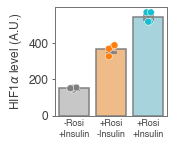

In [99]:


barprop = dict(ci=68, capsize=0.2, errcolor='gray', edgecolor=[127/255, 127/255, 127/255], linewidth=1.5)

palette=[C['gray'], C['orange'], C['cyan']]
palette1=[CL['gray'], CL['orange'], CL['cyan']]
fig, ax = plt.subplots(1, 1, figsize=(2, 2))

sns.stripplot(data=np.array([norosi, noins, withins+[np.nan, np.nan]]).T, palette=palette, edgecolor='w', linewidth=0.5, size=7)

sns.barplot(data=np.array([norosi, noins, withins+[np.nan, np.nan]]).T, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['-Rosi\n+Insulin', '+Rosi\n-Insulin', '+Rosi\n+Insulin'], horizontalalignment='center', fontsize=9)
ax.tick_params(axis='x', length=0)
ax.set_ylabel(r'HIF1$\alpha$ level (A.U.)', fontsize=12)

In [101]:
run = lambda x: np.median([np.mean([alldata2['{0}-Site_{1}'.format(x, i)][:, 0]]) for i in range(16)])
hypo = [run('A5'), run('B5'), run('A6'), run('B6')]
hypodmog = [run('E5'), run('E6')]

Text(0, 0.5, 'HIF1$\\alpha$ level\n(normalized)')

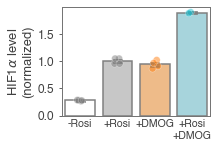

In [104]:
barprop = dict(ci=68, capsize=0.2, errcolor='gray', edgecolor=[127/255, 127/255, 127/255], linewidth=1.5)
palette=[[199/255, 199/255, 199/255], [255/255, 187/255, 120/255], [158/255, 218/255, 229/255]]

palette=[C['gray'], C['gray'], C['orange'], C['cyan']]
palette1=[CL['white'], CL['gray'], CL['orange'], CL['cyan']]
fig, ax = plt.subplots(1, 1, figsize=(8/3, 2))

data = np.array([norosi, withins, hypo, hypodmog + [np.nan, np.nan]]).T/np.mean(withins)

sns.stripplot(data=data, palette=palette, edgecolor='w', linewidth=0.5, size=7, alpha=0.5)

sns.barplot(data=data, ax=ax, palette=palette1, **barprop)
ax.set_xticklabels(['-Rosi', '+Rosi', '+DMOG', '+Rosi\n+DMOG'], horizontalalignment='center', fontsize=10.5)
ax.tick_params(axis='x', length=0)
ax.set_ylabel('HIF1$\\alpha$ level\n(normalized)', fontsize=13)